# Fig 4.1 - Ionization State in the Solar Interior

Figure 4.1 from Chapter 4 of Stellar Structure & Evolution Pinsonneault & Ryden, Cambridge University Press.

Ionization state in the Sun.  Plots the Saha equation showing $\rho_{1/2}(T)$ in the $\rho-T$ plane, 
with an overlay of ionization state at different locations in the Sun, and the BP2004 solar model for actual 
conditions.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig4_1.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data and Model

BP2004_SolarInterior.txt is the BP2004 solar interior model, columns {T, Rho, P, L/Lsun, X, Y, He3, C12, N14,
O16} T, Rho, and P in cgs units.

Model is $\rho_{1/2}(T)$, the density at which hydrogen in half ionized:
$$
\rho_{1/2} = 0.50 {\rm\,g}{\rm\,cm}^{-3}
\left( {k T \over 13.6 {\rm\,eV}} \right)^{3/2}
\exp \left( - {13.6 {\rm\,eV} \over kT} \right) \ .
$$

We use the Holweger & Mueller (1974, Solar Physics, 39, 19) Solar atmosphere model to get the photosphere values at the base of the photosphere ($\tau_{5000A}$=1)

Base of the convection zone is evaluated from the BP2004 model at the tachocline (~0.71 R$_{sun}$).

In [3]:
sunFile = 'BP2004_SolarInterior.txt'

sunData = pd.read_csv(sunFile,delimiter=r'\s+',comment='#') # ascii, variable space delimited with header

sunT = np.array(sunData['T'])
sunRho = np.array(sunData['Rho'])

minT = 3.30 # log T
maxT = 9.30
k = 8.6173303E-05 # Boltzmann constant in eV/K
ipH = 13.59844 # hydrogen ionization energy in eV

logT = np.linspace(minT,maxT,500)
T = 10.0**logT
rho = 0.5*((k*T/ipH)**1.5)*np.exp(-ipH/(k*T))

# conditions at the core

coreRho = sunRho[0]
coreT = sunT[0]

# base of the convection zone (~0.71 Rsun tachocline, BP2004 model)

bczRho = 0.19
bczT = 2.2e6

# photosphere (Holweger-Mueller Model Atmosphere)

psRho = 3.0e-7
psT = 6533.

## Make the plot

Plot the $\rho_{1/2}(T)$ curve as a black solid line, the BP2004 solar interior as dashed line, dots for the core, tachocline, and photosphere of the Sun, and label ionized and neutral regions of the $\rho-T$ plane.

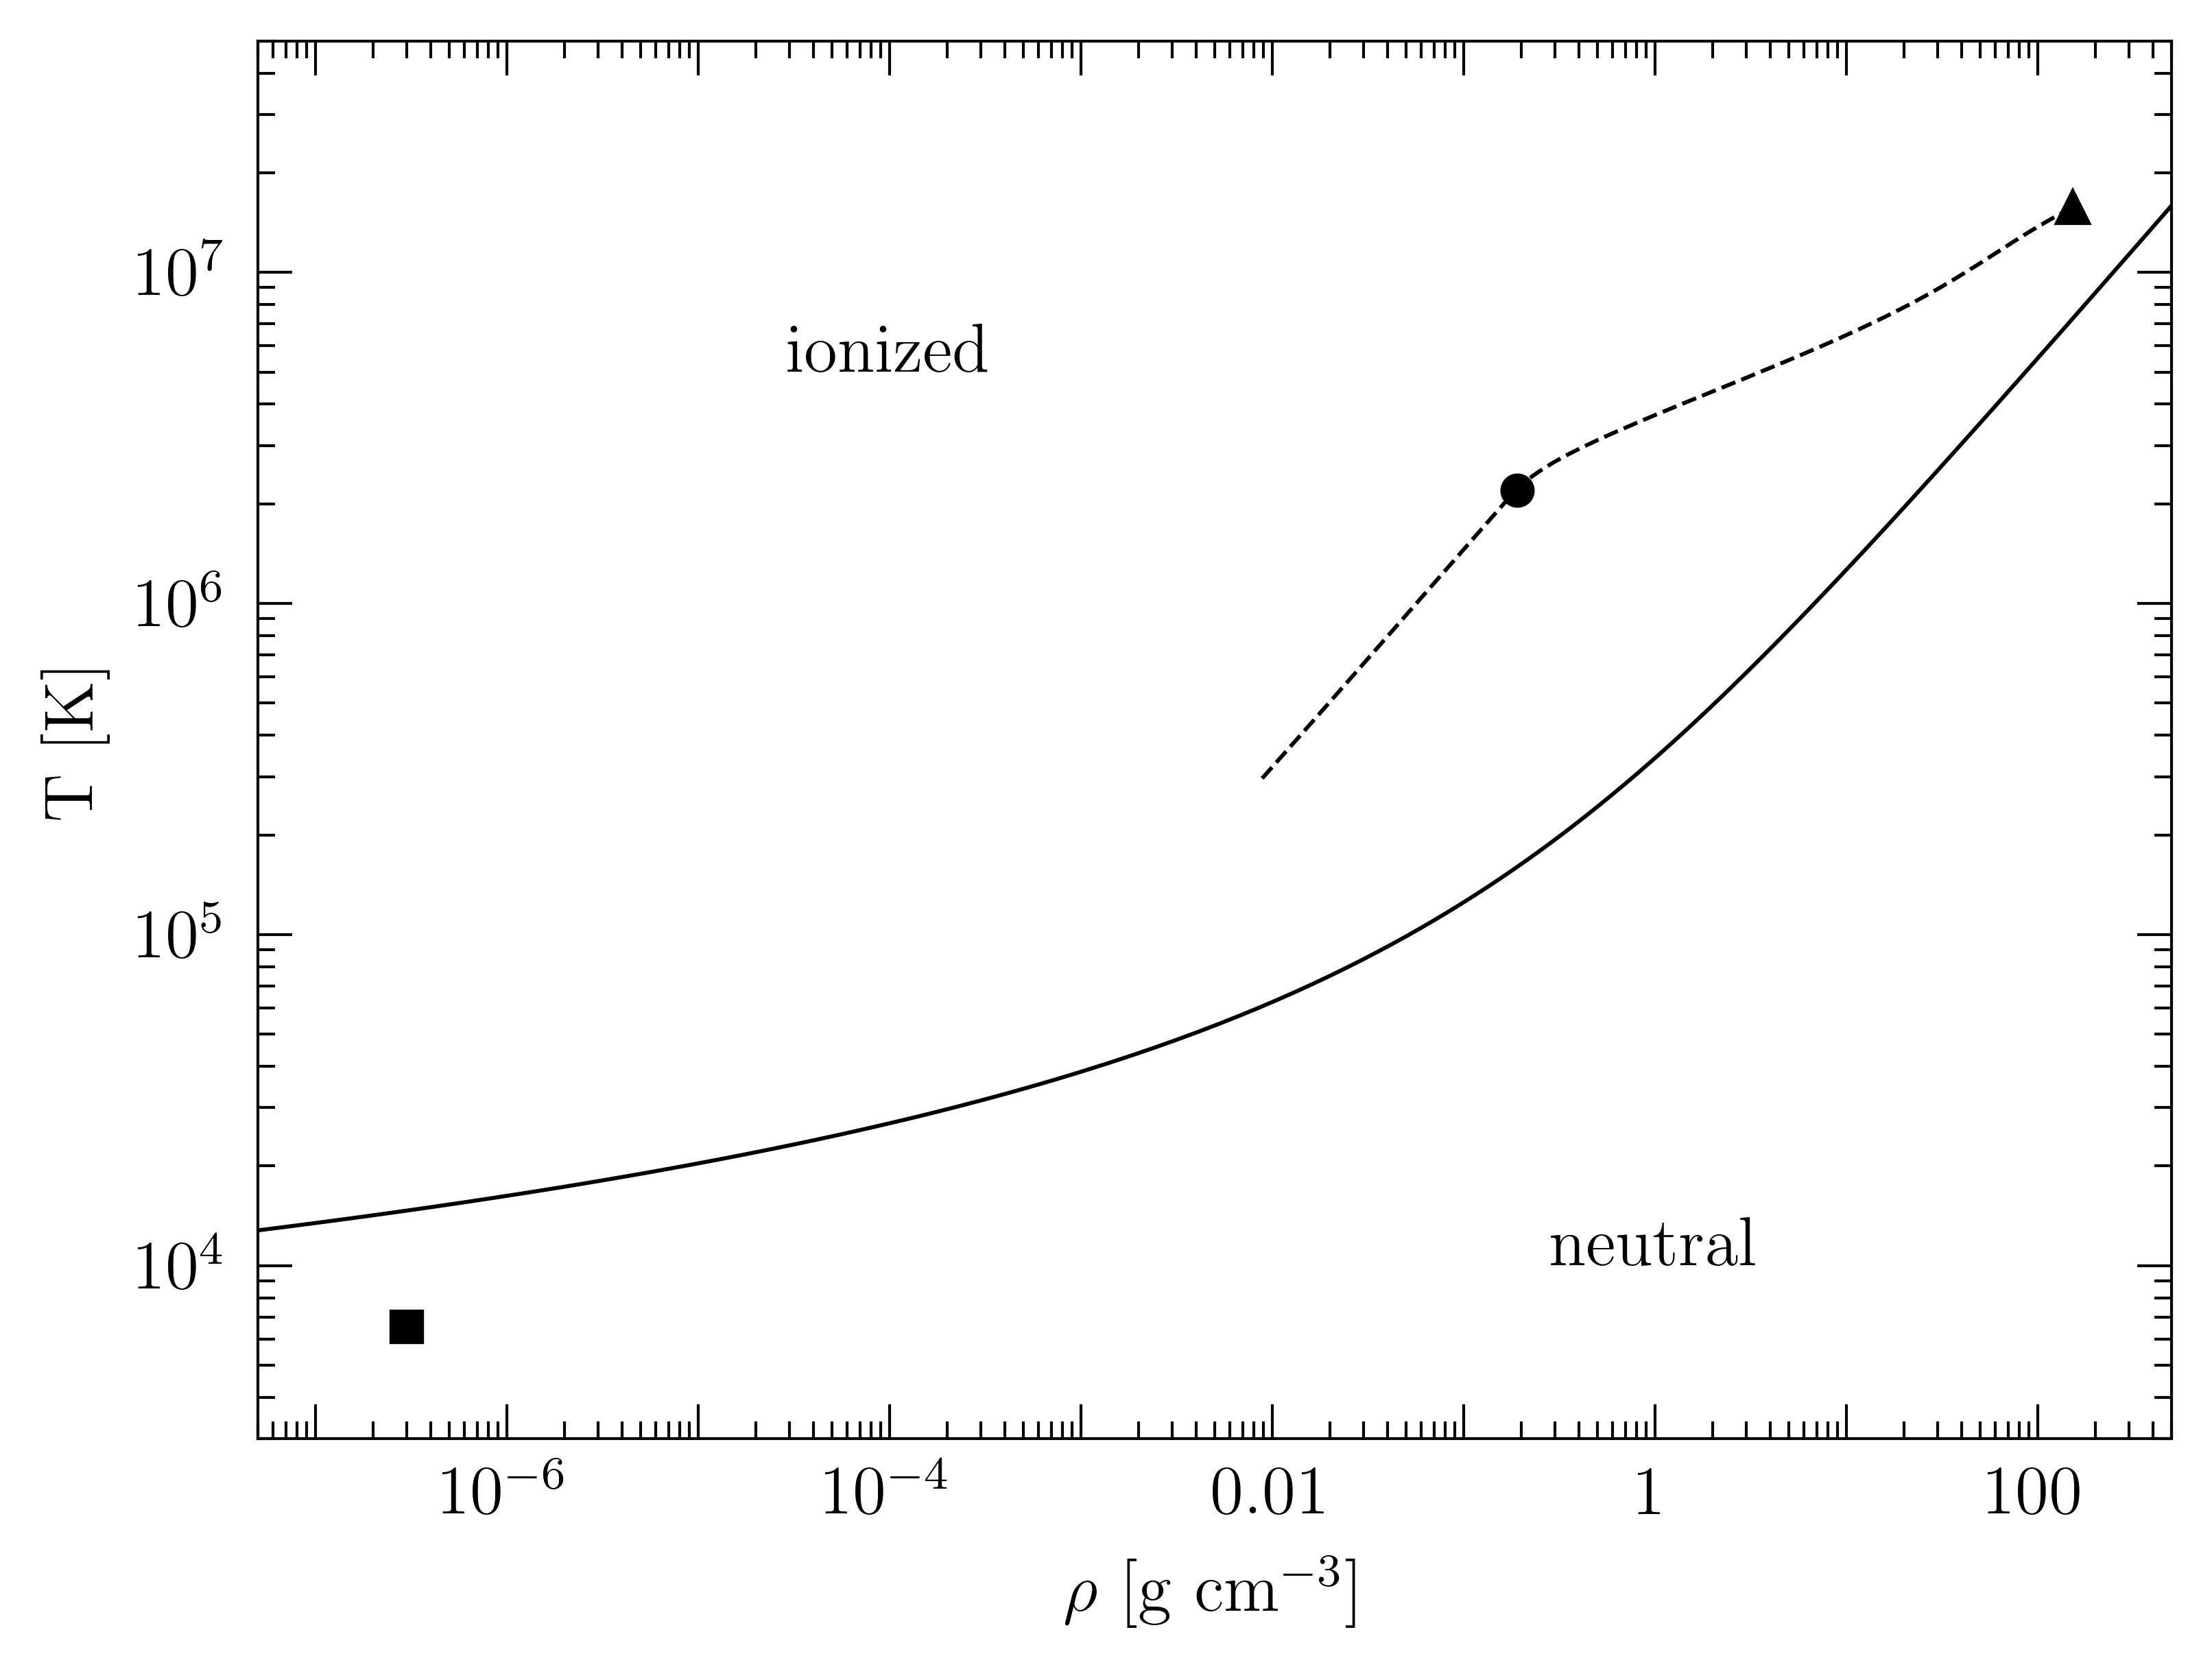

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(5e-8,500.0)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([1.0e-7,1.0e-6,1.0e-5,0.0001,0.001,0.01,0.1,1.,10.,100.])
ax.set_xticklabels(['10$^{-7}$','10$^{-6}$','$10^{-5}$','10$^{-4}$','0.001','0.01','0.1','1','10','100'])
ax.set_xticklabels(['','10$^{-6}$','','10$^{-4}$','','0.01','','1','','100'])
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]',fontsize=axisFontSize)

ax.set_ylim(3000.0,5.0e7)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0E4,1.0E5,1.0E6,1.0E7])
ax.set_yticklabels(['$10^{4}$','10$^5$','10$^6$','10$^7$'])
ax.set_ylabel(r'T [K]',fontsize=axisFontSize)

ax.plot(rho,T,'-',color='black',lw=0.7,zorder=10)
ax.plot(sunRho,sunT,'--',color='black',lw=0.7,zorder=9)

# Reference Points

ax.plot(coreRho,coreT,'^',color='black',ms=5) # Center of the Sun
ax.plot(bczRho,bczT,'o',color='black',ms=5) # base of the convection zone
ax.plot(psRho,psT,'s',color='black',ms=5) # photosphere

ax.text(1e-4,5e6,'ionized',ha='center',fontsize=axisFontSize)
ax.text(1.0,1e4,'neutral',ha='center',fontsize=axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')